# ElasticNet Classifier

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pickle
import sklearn.model_selection as model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import sklearn.model_selection as model_selection
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import ElasticNet

In [3]:
# flights table
data = pd.read_csv('/Users/Matthew Wong/flights_table_optimized(50,000 points).csv',delimiter=';')
data = data.iloc[: , 1:]

In [4]:
#Assign train and target variables
X = data[['month','day','year','origin_city','origin_city_state','dest_city','dest_city_state','Route','distance','air_time','depart_hour','dep_delay_route','arr_delay_route','taxi_out_route','taxi_in_route','dep_delay_city','arr_delay_city','taxi_out_city','taxi_in_city','dep_delay_month','arr_delay_month','taxi_out_month','taxi_in_month']]
y = data['arr_delay']

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,train_size=0.75,test_size=0.25,random_state=123)

In [5]:
display(data.head(3))
display(data.shape)

,month,day,year,origin_city,origin_city_state,dest_city,dest_city_state,Route,distance,air_time,...,taxi_in_route,dep_delay_city,arr_delay_city,taxi_out_city,taxi_in_city,dep_delay_month,arr_delay_month,taxi_out_month,taxi_in_month,arr_delay
0,12,30,2019,220,17,105,8,2987,674.0,84.0,...,8.444444,1.710611,-4.176849,11.800643,8.057878,0.892546,-5.488575,17.429543,7.718988,-3.0
1,4,8,2018,296,49,233,4,4370,672.0,98.0,...,6.208333,1.014692,-4.634527,19.509642,6.965106,-0.045202,-5.727201,16.802538,7.431139,25.0
2,11,21,2018,52,40,17,9,604,259.0,46.0,...,10.238095,-1.163522,-7.421384,14.861635,8.779874,0.093850,-5.732620,16.940107,7.404545,-13.0


(44551, 24)

In [6]:
model = ElasticNet()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

R2 Score for train data: 0.19
R2 Score2 for test data: 0.191
MAE Score for test data:  10.68


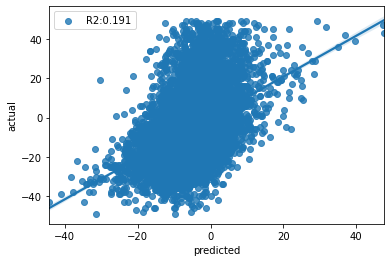

In [7]:
#prints the R2 score for your test dataset
print('R2 Score for train data:', round(model.score(X_train,y_train),3))
print('R2 Score2 for test data:', round(r2_score(y_test,y_pred),3))
print('MAE Score for test data: ', round(mean_absolute_error(y_test,y_pred),2))

df = pd.DataFrame(
        {
            'actual':y_test,
            'predicted':y_pred
        }
)
df

sns.regplot(x='predicted',y='actual',data=df,label='R2:'+ str(round(r2_score(y_test,y_pred),3)))
plt.legend(loc=0)
plt.show()

# ElasticNet Classifier Grid Search

In [10]:
#define hyperparameters we want to tune
param_grid = {
    'max_iter' : [1, 5, 10, 50, 100, 150],
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'l1_ratio' : np.arange(0.0, 1.0, 0.1),
}

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

#instantiate GridSearchCV, fit model, and make prediction
model = GridSearchCV(ElasticNet(), param_grid = param_grid, cv = 5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

df = pd.DataFrame(model.cv_results_)

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2862224.7702859216, tolerance: 653.69020778526
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2861364.061713464, tolerance: 651.583516531987
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2850755.754010736, tolerance: 650.7929789188179
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2618669.1256999234, tolerance: 650.7929789188179
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2613292.820482712, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2625825.977304969, tolerance: 651.8538605738655
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desc

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2626502.1324320883, tolerance: 651.8538605738655
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2638161.3278240818, tolerance: 653.69020778526
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2627936.5761757484, tolerance: 651.583516531987
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desce

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2628684.4451208664, tolerance: 651.583516531987
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2619330.2503318693, tolerance: 650.7929789188179
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2614009.362962255, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desc

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2624158.7109615207, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2636594.628106471, tolerance: 651.8538605738655
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2638904.6361178807, tolerance: 653.69020778526
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desce

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2639118.75908149, tolerance: 651.583516531987
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2629233.8941845307, tolerance: 650.7929789188179
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2624158.9159305682, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desce

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2708002.276016975, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2720399.638049506, tolerance: 651.8538605738655
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2649069.7452123445, tolerance: 653.69020778526
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descen

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2712165.0030275313, tolerance: 650.7929789188179
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2708002.6591140297, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2720400.0927825514, tolerance: 651.8538605738655
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_de

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2722120.62429178, tolerance: 651.583516531987
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2712165.4311554725, tolerance: 650.7929789188179
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2708003.042214358, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descen

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2720401.0021453225, tolerance: 651.8538605738655
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2649070.426349023, tolerance: 653.69020778526
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2639120.1366559705, tolerance: 651.583516531987
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descen

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2708003.8084254256, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2720401.456774941, tolerance: 651.8538605738655
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2649070.6522839, tolerance: 653.69020778526
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2712186.9014436994, tolerance: 650.7929789188179
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2708050.66144871, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2720419.9372069095, tolerance: 651.8538605738655
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desc

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2712191.0927545214, tolerance: 650.7929789188179
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2708054.439965327, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2720424.3805866586, tolerance: 651.8538605738655
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_des

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2708058.208925438, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2720428.8186385296, tolerance: 651.8538605738655
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2649158.089234573, tolerance: 653.69020778526
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descen

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2722173.5700257253, tolerance: 651.583516531987
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2712199.441875184, tolerance: 650.7929789188179
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2708061.968376335, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desce

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2708065.7915336816, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2720437.6784002376, tolerance: 651.8538605738655
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2649163.7882301183, tolerance: 653.69020778526
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desc

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2712207.7767817993, tolerance: 650.7929789188179
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2708070.1805846314, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2720442.0999121573, tolerance: 651.8538605738655
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_de

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2712211.9552694946, tolerance: 650.7929789188179
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2708074.564331785, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2720446.5156991174, tolerance: 651.8538605738655
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_des

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2722190.121056617, tolerance: 651.583516531987
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2712216.1219938183, tolerance: 650.7929789188179
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2708078.555724196, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desce

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2729153.3752043997, tolerance: 653.69020778526
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2722194.274079501, tolerance: 651.583516531987
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2712220.2766608098, tolerance: 650.7929789188179
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descen

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2722198.429962, tolerance: 651.583516531987
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2712224.4189581266, tolerance: 650.7929789188179
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2708086.547297535, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2712423.2360701207, tolerance: 650.7929789188179
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2708408.6976242117, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2720633.0709888353, tolerance: 651.8538605738655
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_de

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2712459.880196699, tolerance: 650.7929789188179
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2708447.654835279, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2720671.0427282206, tolerance: 651.8538605738655
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desc

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2712494.991246698, tolerance: 650.7929789188179
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2708485.6610276345, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2720707.8370673177, tolerance: 651.8538605738655
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_des

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2708523.265950077, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2720743.3087438736, tolerance: 651.8538605738655
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2649822.9217515625, tolerance: 653.69020778526
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desce

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2720777.171969826, tolerance: 651.8538605738655
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2649862.26578694, tolerance: 653.69020778526
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2639921.473885523, tolerance: 651.583516531987
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.p

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2720804.6557456288, tolerance: 651.8538605738655
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2649901.5070214965, tolerance: 653.69020778526
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2639961.555894963, tolerance: 651.583516531987
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descen

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2712610.904888522, tolerance: 650.7929789188179
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2708645.014063808, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2720831.3616913958, tolerance: 651.8538605738655
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desc

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2712641.328492141, tolerance: 650.7929789188179
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2708683.0977323875, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2720857.270325648, tolerance: 651.8538605738655
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desc

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2712671.5335273626, tolerance: 650.7929789188179
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2708720.2969839363, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2720882.3095853105, tolerance: 651.8538605738655
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_de

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2722825.577295968, tolerance: 651.583516531987
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2712701.5167933824, tolerance: 650.7929789188179
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2708756.394412067, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desce

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2714535.036370162, tolerance: 650.7929789188179
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2710711.5494871237, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2722623.8428645097, tolerance: 651.8538605738655
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_des

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2711033.4665404405, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2722924.2084988006, tolerance: 651.8538605738655
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2652810.030212514, tolerance: 653.69020778526
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desce

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2711300.811865236, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2723172.7567864205, tolerance: 651.8538605738655
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2653000.954725443, tolerance: 653.69020778526
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descen

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2725629.14360969, tolerance: 651.583516531987
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2715340.4965591803, tolerance: 650.7929789188179
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2711504.574971815, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descen

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2753173.8271879405, tolerance: 651.8538605738655
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2732719.2211865583, tolerance: 653.69020778526
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2725800.195665443, tolerance: 651.583516531987
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descen

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2745065.7068289435, tolerance: 650.7929789188179
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2741372.100510586, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2753333.999552621, tolerance: 651.8538605738655
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desc

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2745189.1150569483, tolerance: 650.7929789188179
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2741483.147122919, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2753468.046286465, tolerance: 651.8538605738655
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desc

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2745306.9435663507, tolerance: 650.7929789188179
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2741608.258247455, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2753575.1158455517, tolerance: 651.8538605738655
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_des

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2761066.8799564713, tolerance: 653.69020778526
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2754818.0325611355, tolerance: 651.583516531987
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2745406.4569289903, tolerance: 650.7929789188179
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desce

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2741818.677472417, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2753744.276470147, tolerance: 651.8538605738655
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2733460.191007501, tolerance: 653.69020778526
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2768309.6874639913, tolerance: 651.583516531987
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2757669.820996167, tolerance: 650.7929789188179
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2754740.448302328, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desce

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2758885.304464729, tolerance: 650.7929789188179
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2756026.895731873, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2767182.988183899, tolerance: 651.8538605738655
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desce

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2770010.362593564, tolerance: 651.583516531987
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2759246.1633406025, tolerance: 650.7929789188179
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2756412.41891772, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descen

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2759217.2371133785, tolerance: 650.7929789188179
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2756548.475886054, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2767687.163680668, tolerance: 651.8538605738655
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desc

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2771108.2581506865, tolerance: 651.583516531987
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2759513.313077021, tolerance: 650.7929789188179
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2756972.4088137527, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desc

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2757347.1755972686, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2768099.9069065694, tolerance: 651.8538605738655
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2749196.886596613, tolerance: 653.69020778526
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desce

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2759814.2985530426, tolerance: 650.7929789188179
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2757503.969609428, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2768157.9914163323, tolerance: 651.8538605738655
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_des

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2759710.5284291795, tolerance: 650.7929789188179
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2757151.643418665, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2768001.327437202, tolerance: 651.8538605738655
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desc

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2900182.694835451, tolerance: 651.8538605738655
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2776010.9668886582, tolerance: 653.69020778526
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2770935.5242719934, tolerance: 651.583516531987
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descen

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2758862.491963647, tolerance: 650.7929789188179
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2756307.6676181667, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2767611.325092285, tolerance: 651.8538605738655
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desc

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2849828.8713740045, tolerance: 651.583516531987
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2837656.844724342, tolerance: 650.7929789188179
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2837362.574916668, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desce

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2850559.9998821216, tolerance: 651.583516531987
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2838296.8116786885, tolerance: 650.7929789188179
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2838289.604103145, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desc

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2833809.396700921, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2841239.760368778, tolerance: 651.8538605738655
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2819014.459331174, tolerance: 653.69020778526
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2809818.9556767773, tolerance: 653.69020778526
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2805479.6938123666, tolerance: 651.583516531987
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2793468.688517906, tolerance: 650.7929789188179
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descen

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2819204.8232396417, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2826498.4400515486, tolerance: 651.8538605738655
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2797755.156311577, tolerance: 653.69020778526
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desce

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2781059.0876043392, tolerance: 651.583516531987
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2769916.5906585264, tolerance: 650.7929789188179
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2769855.411597407, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desc

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2797685.4061415712, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2804293.617886236, tolerance: 651.8538605738655
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2769036.8754887045, tolerance: 653.69020778526
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desce

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2750507.4625776485, tolerance: 651.583516531987
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2740381.1488705673, tolerance: 650.7929789188179
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2740443.963935102, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desc

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2732579.989199561, tolerance: 651.583516531987
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2723070.6437354283, tolerance: 650.7929789188179
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2723204.0427243966, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desc

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2759377.7328447495, tolerance: 651.8538605738655
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2712863.9648307078, tolerance: 653.69020778526
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2712831.5672439933, tolerance: 651.583516531987
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desce

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3046141.88237423, tolerance: 650.7929789188179
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3049858.2729964596, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3051330.536539276, tolerance: 651.8538605738655
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desce

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2847328.360125624, tolerance: 650.7929789188179
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2852446.74141877, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2850104.560436344, tolerance: 651.8538605738655
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descen

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2404681.366157482, tolerance: 650.7929789188179
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2413571.379621417, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2401278.675117226, tolerance: 651.8538605738655
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desce

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1409019.7279278329, tolerance: 650.7929789188179
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1433975.1208647322, tolerance: 651.5637313456288
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1384820.3064404908, tolerance: 651.8538605738655
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_de

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 791955.2080496154, tolerance: 653.69020778526
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 601128.5910115046, tolerance: 651.583516531987
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 260457.42399803828, tolerance: 650.7929789188179
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent

In [11]:
display(model.best_params_)
display(model.best_score_)

df.sort_values('rank_test_score', ascending = True).head(3)

{'alpha': 0.001, 'l1_ratio': 0.0, 'max_iter': 150}

0.19327786759385035

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
65,0.289085,0.028987,0.002928,0.000617,0.001,0,150,"{'alpha': 0.001, 'l1_ratio': 0.0, 'max_iter': ...",0.200682,0.198251,0.191395,0.180879,0.195183,0.193278,0.006935,1
71,0.428382,0.181830,0.003420,0.000756,0.001,0.1,150,"{'alpha': 0.001, 'l1_ratio': 0.1, 'max_iter': ...",0.200680,0.198250,0.191395,0.180877,0.195183,0.193277,0.006935,2
125,0.275890,0.024630,0.002928,0.001069,0.01,0,150,"{'alpha': 0.01, 'l1_ratio': 0.0, 'max_iter': 150}",0.200712,0.198286,0.191292,0.181073,0.195019,0.193276,0.006874,3
